# Assessment 1 - Machine Learning
# (Exercise 2 - Classification Task)

**Kaggle Notebook by Val Kyrvey L. Latoja**

**Brief**

The student is tasked to do two (2) exercises that will put their fundamental knowledge of machine learning to the test. The data must have a minimum of 5 features (Columns) with no limitation.

**Goal**

The goal is to complete all tasks and exercises as per the instructions from the [GitHub](https://github.com/usmanahmad11/Experiment-Portfolio/wiki/Machine-Learning-Assignment-1-%E2%80%90-40%25-Instructions) page implemented by the advisor. The student should know the crucial knowledge of machine learning methods and algorithms.

## 2.1 Library/CSV Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.2 Data Cleaning

In [2]:
data = data.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data.isnull().sum()
data = data.fillna(0)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [3]:
# Convert text categories to numbers
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex']) # male=1, female=0

## 2.3 Raw Data Visualization

Did not Survive = 0, Survived = 1


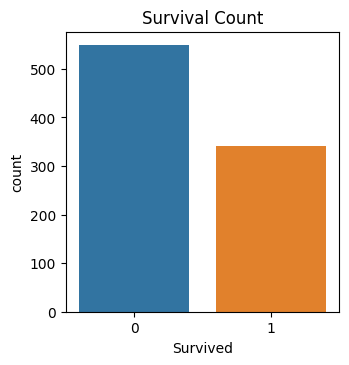

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
print('Did not Survive = 0, Survived = 1')

Female = 0, Male = 1


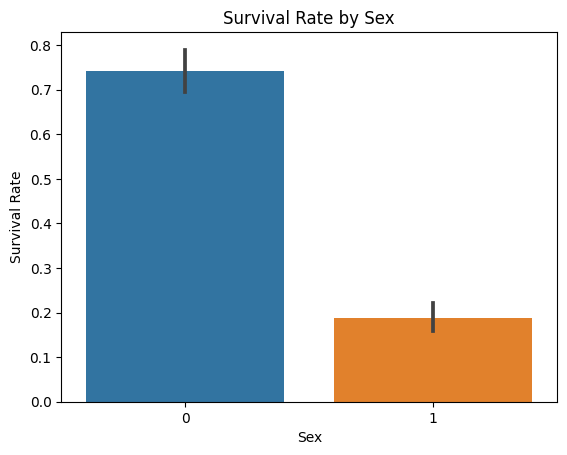

In [5]:
print('Female = 0, Male = 1')
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

1st Class = 1, 2nd Class = 2, 3rd class = 3


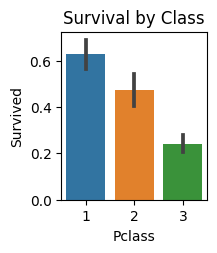

In [6]:
plt.subplot(2, 3, 3)
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival by Class')
print('1st Class = 1, 2nd Class = 2, 3rd class = 3')

## 2.4 Decision Tree Implementation

In [7]:
# Define features (X) and target (y)
x = data.drop('Survived', axis=1)
y = data['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

In [9]:
# Create and train the model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
y_pred = clf.predict(x_test)

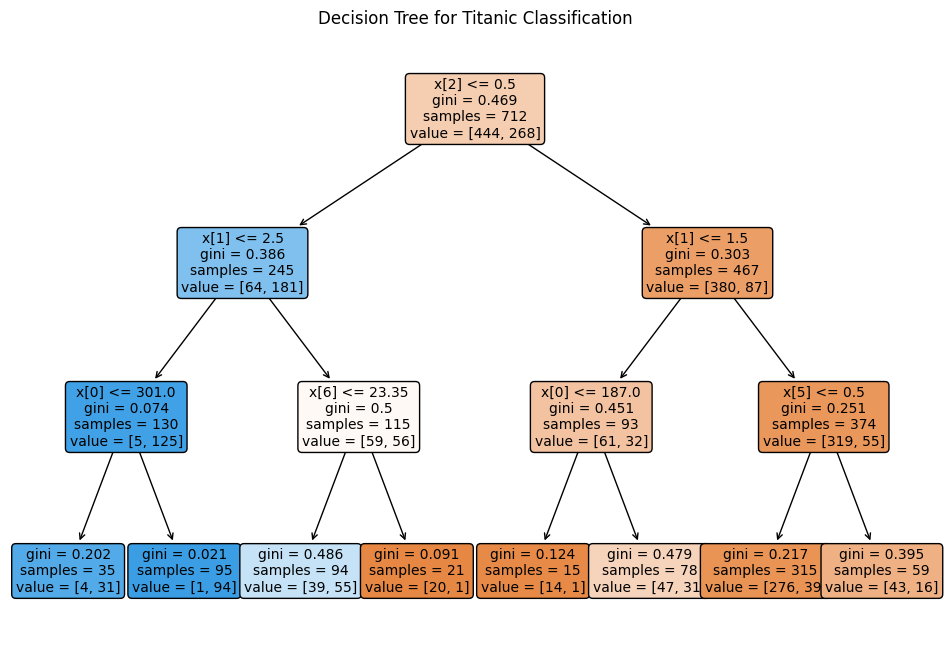

In [11]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Titanic Classification")
plt.show()

## 2.5 Accuracy, Confusion Matrix

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


<Axes: >

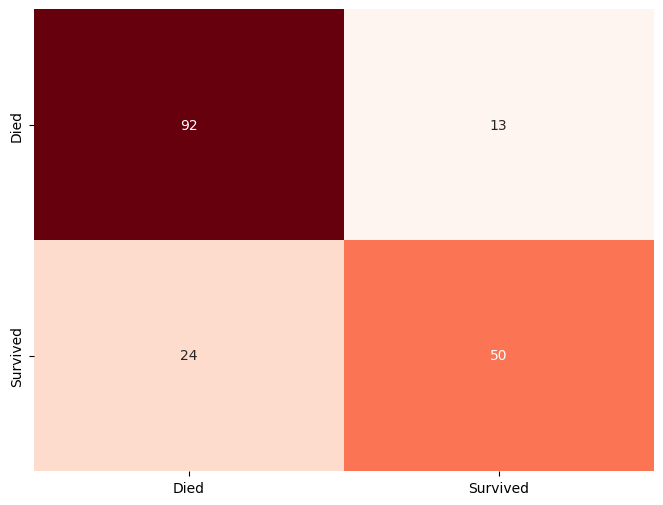

In [13]:
cm = confusion_matrix(y_test, y_pred)          # raw counts
cm_percent = cm.astype('float') / cm.sum() * 100   # percentages

plt.figure(figsize=(8, 6))                     # nice square size
sns.heatmap(
    cm,
    annot=True, fmt='d', cmap='Reds',
    xticklabels=['Died', 'Survived'],
    yticklabels=['Died', 'Survived'],
    cbar=False
)